In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, ensemble, tree

In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [3]:
F2 = pd.read_csv('F2.csv')
F3 = pd.read_csv('F3.csv')
F2.head()
F3.head()

,userid,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,...,F2.27,F2.28,F2.29,F2.30,F2.31,F2.32,F2.33,F2.34,F2.35,F2.36
0,100000000013,2,0,0,0.0,1,2,1,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100000000393,1,0,0,0.0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000000459,2,0,0,0.0,1,2,1,2,1,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100000000637,1,0,0,0.0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100000000695,1,0,0,0.0,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,userid,F3.1,F3.2,F3.3,F3.4,F3.5,F3.6,F3.7,F3.8,F3.9,...,F3.71,F3.72,F3.73,F3.74,F3.75,F3.76,F3.77,F3.78,F3.79,F3.80
0,100000000013,143,85,58,79.0,1.0,4.0,1.0,32.0,18.0,...,NaN,NaN,9.219558e+06,1.049036e+14,1204.0,20245128.0,13829334.0,3.824344e+14,1204.0,27657464.0
1,100000000111,3,1,2,1.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100000000127,6,2,4,2.0,0.0,0.0,0.0,2.0,0.0,...,3266886.0,3266886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000000231,44,28,16,15.0,6.0,2.0,5.0,10.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000000379,84,58,26,42.0,3.0,7.0,6.0,14.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
F2_data = F2[["userid","F2.1","F2.3"]]
F3_data = F3.iloc[:,0:13]

In [5]:
F2_3 = F2_data.merge(F3_data,on="userid",how="left")

In [6]:
F2_3.head()

,userid,F2.1,F2.3,F3.1,F3.2,F3.3,F3.4,F3.5,F3.6,F3.7,F3.8,F3.9,F3.10,F3.11,F3.12
0,100000000013,2,0,143,85,58,79.0,1.0,4.0,1.0,32.0,18.0,1.0,4.0,3.0
1,100000000393,1,0,38,24,14,23.0,0.0,1.0,0.0,8.0,3.0,1.0,1.0,1.0
2,100000000459,2,0,71,17,54,17.0,0.0,0.0,0.0,19.0,30.0,0.0,2.0,3.0
3,100000000637,1,0,41,14,27,14.0,0.0,0.0,0.0,18.0,9.0,0.0,0.0,0.0
4,100000000695,1,0,31,13,18,4.0,3.0,1.0,5.0,10.0,4.0,2.0,1.0,1.0


In [7]:
feature = F2_3[["userid"]]
feature.head()

,userid
0,100000000013
1,100000000393
2,100000000459
3,100000000637
4,100000000695


In [8]:
# F2.1 为总订单数量  F3.1 每个用户事件交互次数  F3.2 为非支付动作交互次数 F3.3 支付动作交互次数 F3.4~F3.12 为动作1~9交互次数
feature.loc[:, "F2.3.1"] = F2_3.loc[:, 'F3.1'] / F2_3.loc[:, 'F2.1']
feature.loc[:, "F2.3.2"] = F2_3.loc[:, "F3.2"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.3"] = F2_3.loc[:, "F3.3"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.4"] = F2_3.loc[:, "F3.4"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.5"] = F2_3.loc[:, "F3.5"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.6"] = F2_3.loc[:, "F3.6"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.7"] = F2_3.loc[:, "F3.7"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.8"] = F2_3.loc[:, "F3.8"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.9"] = F2_3.loc[:, "F3.9"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.10"] = F2_3.loc[:, "F3.10"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.11"] = F2_3.loc[:, "F3.11"]/F2_3.loc[:, "F2.1"]
feature.loc[:, "F2.3.12"] = F2_3.loc[:, "F3.12"]/F2_3.loc[:, "F2.1"]
feature.head()

/Users/JQC/.local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/JQC/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,userid,F2.3.1,F2.3.2,F2.3.3,F2.3.4,F2.3.5,F2.3.6,F2.3.7,F2.3.8,F2.3.9,F2.3.10,F2.3.11,F2.3.12
0,100000000013,71.5,42.5,29.0,39.5,0.5,2.0,0.5,16.0,9.0,0.5,2.0,1.5
1,100000000393,38.0,24.0,14.0,23.0,0.0,1.0,0.0,8.0,3.0,1.0,1.0,1.0
2,100000000459,35.5,8.5,27.0,8.5,0.0,0.0,0.0,9.5,15.0,0.0,1.0,1.5
3,100000000637,41.0,14.0,27.0,14.0,0.0,0.0,0.0,18.0,9.0,0.0,0.0,0.0
4,100000000695,31.0,13.0,18.0,4.0,3.0,1.0,5.0,10.0,4.0,2.0,1.0,1.0


In [9]:
# F2.3 为精品订单总数量  F3.1 每个用户事件交互次数  F3.2 为非支付动作交互次数 F3.3 支付动作交互次数 F3.4~F3.12 为动作1~9交互次数
feature.loc[:, "F2.3.13"] = F2_3.loc[:, 'F3.1'] / F2_3.loc[:, 'F2.3']
feature.loc[:, "F2.3.14"] = F2_3.loc[:, "F3.2"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.15"] = F2_3.loc[:, "F3.3"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.16"] = F2_3.loc[:, "F3.4"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.17"] = F2_3.loc[:, "F3.5"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.18"] = F2_3.loc[:, "F3.6"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.19"] = F2_3.loc[:, "F3.7"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.20"] = F2_3.loc[:, "F3.8"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.21"] = F2_3.loc[:, "F3.9"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.22"] = F2_3.loc[:, "F3.10"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.23"] = F2_3.loc[:, "F3.11"]/F2_3.loc[:, "F2.3"]
feature.loc[:, "F2.3.24"] = F2_3.loc[:, "F3.12"]/F2_3.loc[:, "F2.3"]
feature.head()

,userid,F2.3.1,F2.3.2,F2.3.3,F2.3.4,F2.3.5,F2.3.6,F2.3.7,F2.3.8,F2.3.9,...,F2.3.15,F2.3.16,F2.3.17,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24
0,100000000013,71.5,42.5,29.0,39.5,0.5,2.0,0.5,16.0,9.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,100000000393,38.0,24.0,14.0,23.0,0.0,1.0,0.0,8.0,3.0,...,inf,inf,NaN,inf,NaN,inf,inf,inf,inf,inf
2,100000000459,35.5,8.5,27.0,8.5,0.0,0.0,0.0,9.5,15.0,...,inf,inf,NaN,NaN,NaN,inf,inf,NaN,inf,inf
3,100000000637,41.0,14.0,27.0,14.0,0.0,0.0,0.0,18.0,9.0,...,inf,inf,NaN,NaN,NaN,inf,inf,NaN,NaN,NaN
4,100000000695,31.0,13.0,18.0,4.0,3.0,1.0,5.0,10.0,4.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [10]:
# 空值填充0
feature = feature.fillna(0)

In [11]:
is_inf = np.isinf(feature)
# 将无穷大填充NaN
feature[is_inf]= float("NaN") # 极值填充
feature.head()


,userid,F2.3.1,F2.3.2,F2.3.3,F2.3.4,F2.3.5,F2.3.6,F2.3.7,F2.3.8,F2.3.9,...,F2.3.15,F2.3.16,F2.3.17,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24
0,100000000013,71.5,42.5,29.0,39.5,0.5,2.0,0.5,16.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100000000393,38.0,24.0,14.0,23.0,0.0,1.0,0.0,8.0,3.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,100000000459,35.5,8.5,27.0,8.5,0.0,0.0,0.0,9.5,15.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3,100000000637,41.0,14.0,27.0,14.0,0.0,0.0,0.0,18.0,9.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,100000000695,31.0,13.0,18.0,4.0,3.0,1.0,5.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
feature.to_csv('F2_3.csv', index=False)

## 建模

In [13]:
user_info = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_1.csv')
F2_3 = pd.read_csv('F2_3.csv')

In [14]:
user_info.head()


,userid,gender,province,age
0,100000000013,男,NaN,60后
1,100000000111,NaN,上海,NaN
2,100000000127,NaN,上海,NaN
3,100000000231,男,北京,70后
4,100000000379,男,北京,NaN


In [15]:
# 属性改名
user_info.columns = ["userid","F1.1","F1.2","F1.3"]
user_info = user_info.fillna("未知")

In [16]:
F2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
userid,10637.0,1.119123e+11,1.912741e+09,1.000000e+11,1.109317e+11,1.114505e+11,1.126048e+11,1.149993e+11
F2.1,10637.0,1.941619e+00,2.016963e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.700000e+01
F2.2,10637.0,6.007333e-02,2.376338e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
F2.3,10637.0,2.979223e-01,9.668676e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01
F2.4,10637.0,1.271248e-01,3.088612e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
F2.5,10637.0,1.599511e+00,1.332680e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.400000e+01
F2.6,10637.0,1.264830e+00,6.675026e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
F2.7,10637.0,1.759801e+00,1.614133e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.100000e+01
F2.8,10637.0,1.134060e+00,4.471747e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
F2.9,10637.0,1.862743e+00,1.805449e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.100000e+01


## 归一化

In [17]:
# F2.2","F2.20","F2.23","F2.26","F2.29","F2.32","F2.35 这几列的值 要么为0 要么为1 是bool值
data1 = F2.drop(["F2.2","F2.20","F2.23","F2.26","F2.29","F2.32","F2.35"],axis=1)
data1.set_index(["userid"], inplace=True)

In [18]:
data1 = (data1 - data1.mean(axis=0)) / data1.std(axis=0) #特征归一化
data1.fillna(1, inplace=True) #空值填补1

In [19]:
data1.head()

,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,...,F2.22,F2.24,F2.25,F2.27,F2.28,F2.30,F2.31,F2.33,F2.34,F2.36
userid,,,,,,,,,,,,,,,,,,,,,
100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,-0.336956,...,-0.357648,0.085107,-0.272422,0.440863,-0.230038,-0.297326,-0.279899,-0.384976,-0.278365,-0.378964
100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,-0.336956,...,-0.357648,0.085107,-0.870019,-1.857893,-0.230038,-0.297326,-0.279899,-0.384976,-0.278365,-0.378964
100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,-0.336956,...,-0.357648,0.085107,0.325175,2.739620,-0.230038,-0.297326,-0.279899,-0.384976,-0.278365,-0.378964
100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,-0.336956,...,-0.892637,-2.080644,-0.870019,-1.857893,-0.230038,-0.297326,-0.279899,-0.384976,-0.278365,-0.378964
100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,-0.336956,...,-0.357648,0.085107,-0.272422,0.440863,-0.230038,-0.297326,-0.279899,-0.384976,-0.278365,-0.378964


In [20]:
#筛选F3出需要归一化的特征
# F3.13 为统计非支付占比  F3.14为统计支付占比 F3.16 ~ F3.23 动作1~动作9占比 
# F3.31 ~ F3.33 最后一个,倒数第二个,倒数第三个动作行为
data2 = F3.drop(["F3.13","F3.14","F3.15","F3.16","F3.17","F3.18","F3.19","F3.20","F3.21","F3.22","F3.23","F3.31","F3.32","F3.33"],axis=1)
data2.set_index(["userid"], inplace=True)
data2 = (data2 - data2.mean(axis=0)) / data2.std(axis=0) #特征归一化
data2.fillna(1, inplace=True) #空值填补1

In [21]:
data3 = F2[["userid","F2.2","F2.20","F2.23","F2.26","F2.29","F2.32","F2.35"]]
data4 = F3[["userid","F3.13","F3.14","F3.15","F3.16","F3.17","F3.18","F3.19","F3.20","F3.21","F3.22","F3.23","F3.31","F3.32","F3.33"]]

In [22]:
features = data1.merge(data3, on='userid', how='left')

features = features.merge(data2, on='userid', how='left')
features = features.merge(data4, on='userid', how='left')
features = features.merge(F2_3, on="userid", how="left")
features = features.fillna(1) #空值填补1

In [23]:
features = features.merge(user_info, on="userid",how="left")
features.head()

,userid,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24,F1.1,F1.2,F1.3
0,100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,男,未知,60后
1,100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,女,北京,未知
2,100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,未知,北京,未知
3,100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,未知,辽宁,未知
4,100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,未知,北京,未知


In [24]:
features.to_csv('features.csv', index=False)

## 合并属性表

In [25]:
table_target = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_0.csv')
database = features.merge(table_target, on='userid', how='left')
database.head()

,userid,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24,F1.1,F1.2,F1.3,orderType
0,100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,1.0,1.0,1.0,1.0,1.0,1.0,男,未知,60后,0
1,100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,1.0,1.0,1.0,1.0,1.0,女,北京,未知,0
2,100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,0.0,1.0,1.0,0.0,1.0,1.0,未知,北京,未知,0
3,100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,1.0,1.0,0.0,0.0,0.0,未知,辽宁,未知,1
4,100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,1.0,1.0,1.0,1.0,1.0,未知,北京,未知,1


### 离散型变量One-hot编码

In [26]:
lbe = preprocessing.LabelEncoder()
database['F1.1'] = lbe.fit_transform(database['F1.1'])
database['F1.2'] = lbe.fit_transform(database['F1.2'])
database['F1.3'] = lbe.fit_transform(database['F1.3'])

In [27]:
database.head()

,userid,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24,F1.1,F1.2,F1.3,orderType
0,100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,1.0,1.0,1.0,1.0,1.0,1.0,2,14,1,0
1,100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,1.0,1.0,1.0,1.0,1.0,0,3,5,0
2,100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,0.0,1.0,1.0,0.0,1.0,1.0,1,3,5,0
3,100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,1.0,1.0,0.0,0.0,0.0,1,27,5,1
4,100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,1.0,1.0,1.0,1.0,1.0,1,3,5,1


In [28]:
one_hot = preprocessing.OneHotEncoder(sparse=False)

result = one_hot.fit_transform(
    database[["F1.1","F1.2","F1.3","F2.20","F2.23","F2.26","F2.29","F2.32","F2.35","F3.31","F3.32","F3.33"]]
)
result

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
# orderType放到最后一列
temp_df = pd.DataFrame(database.orderType)
database.drop(['orderType'], axis=1, inplace=True)

database = pd.concat([database, pd.DataFrame(result), temp_df], axis=1)
database.head()

,userid,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,82,83,84,85,86,87,88,89,90,orderType
0,100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [30]:
database.drop(
    ["F1.1","F1.2","F1.3","F2.20","F2.23","F2.26","F2.29","F2.32","F2.35","F3.31","F3.32","F3.33"], 
    axis=1, 
    inplace=True
)

In [31]:
database.head()

,userid,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,82,83,84,85,86,87,88,89,90,orderType
0,100000000013,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100000000393,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,100000000459,0.028945,-0.308131,-0.411592,-0.449854,1.101374,-0.470718,1.936468,-0.477855,4.028396,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,100000000637,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,100000000695,-0.466850,-0.308131,-0.411592,-0.449854,-0.396748,-0.470718,-0.299794,-0.477855,-0.214603,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


### 划分数据集


In [32]:
X = database.iloc[:, 1:-1]
y = database.iloc[:, -1]

x_train,x_test,y_train,y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)

### 决策树

In [33]:
clf = tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=5
).fit(x_train, y_train)

y_pred = clf.predict(x_test)

### 决策树评估

In [34]:
from sklearn import metrics

In [35]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2337
           1       0.90      0.78      0.84       855

    accuracy                           0.92      3192
   macro avg       0.91      0.87      0.89      3192
weighted avg       0.92      0.92      0.92      3192

0.9368526150635468


<Figure size 576x396 with 0 Axes>

([<matplotlib.axis.XTick at 0x1a179c3860>,
 <a list of 10 Text xticklabel objects>)

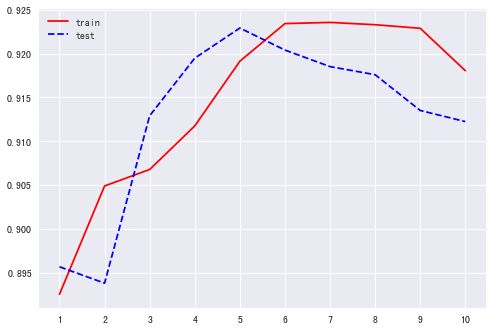

In [36]:
# 绘画学习曲线 寻找最佳的max_depth
train_scores = []
test_scores = []
for i in range(1, 11):
    clf = tree.DecisionTreeClassifier(
        criterion='gini', 
        splitter='best',
        max_depth=i,
    )
    train_score = model_selection.cross_val_score(clf, x_train, y_train, cv=10).mean()
    train_scores.append(train_score)
    
    test_score = model_selection.cross_val_score(clf, x_test, y_test, cv=10).mean()
    test_scores.append(test_score)

plt.figure()
plt.plot(range(1, 11), train_scores, 'r-', label='train')
plt.plot(range(1, 11), test_scores, 'b--', label='test')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

### XGBoost模型

In [37]:
import xgboost as xgb

In [40]:
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test)

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':5,
    'lambda':1,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':27,
    'nthread':8,
     'silent':1}

watchlist = [(dtrain,'train')]

In [42]:
bst = xgb.train(params, dtrain, num_boost_round=300, evals=watchlist)

[0]	train-auc:0.877217
[1]	train-auc:0.923307
[2]	train-auc:0.935188
[3]	train-auc:0.947579
[4]	train-auc:0.948597
[5]	train-auc:0.952421
[6]	train-auc:0.953235
[7]	train-auc:0.953458
[8]	train-auc:0.954176
[9]	train-auc:0.954437
[10]	train-auc:0.954414
[11]	train-auc:0.954758
[12]	train-auc:0.955483
[13]	train-auc:0.95496
[14]	train-auc:0.956288
[15]	train-auc:0.956832
[16]	train-auc:0.95861
[17]	train-auc:0.958821
[18]	train-auc:0.958897
[19]	train-auc:0.961453
[20]	train-auc:0.961247
[21]	train-auc:0.961349
[22]	train-auc:0.962117
[23]	train-auc:0.962162
[24]	train-auc:0.962485
[25]	train-auc:0.962492
[26]	train-auc:0.962938
[27]	train-auc:0.963024
[28]	train-auc:0.962994
[29]	train-auc:0.963375
[30]	train-auc:0.963943
[31]	train-auc:0.964349
[32]	train-auc:0.964335
[33]	train-auc:0.964187
[34]	train-auc:0.964278
[35]	train-auc:0.964428
[36]	train-auc:0.964641
[37]	train-auc:0.964727
[38]	train-auc:0.96513
[39]	train-auc:0.96528
[40]	train-auc:0.965302
[41]	train-auc:0.965567
[42]	t

In [67]:
y_prob = bst.predict(dtest)
y_pred = (y_prob >= 0.5) * 1
metrics.recall_score(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)
metrics.confusion_matrix(y_test, y_pred)


0.8362573099415205

0.9445488721804511

array([[2300,   37],
       [ 140,  715]])

In [68]:
# # 从准确率上来说一般 我们来看看roc曲线
# import scikitplot as skplt

# test_proba_df = pd.DataFrame(y_prob)
# skplt.metrics.plot_roc(y_test, test_proba_df, plot_micro=False, plot_macro=False)